<a href="https://colab.research.google.com/github/MatveiV/ML_Fin_Notebooks/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0_11_1_%D0%A1%D0%B1%D0%BE%D1%80_%D0%B8_%D0%BE%D1%87%D0%B8%D1%81%D1%82%D0%BA%D0%B0_%D1%84%D0%B8%D0%BD%D0%B0%D0%BD%D1%81%D0%BE%D0%B2%D1%8B%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в сбор и очистку финансовых данных

## Обзор важности качественных данных в финансовом анализе

Финансовый анализ является основой для принятия обоснованных решений в бизнесе и инвестициях. Качественные данные играют ключевую роль в этом процессе, так как они обеспечивают точность и надежность анализа. Ошибки в данных могут привести к неверным выводам и, как следствие, к финансовым потерям. Поэтому важно не только собирать данные из надежных источников, но и проводить их тщательную очистку и проверку.

## Основные источники финансовых данных

### Yahoo Finance
Yahoo Finance предоставляет широкий спектр финансовых данных, включая котировки акций, исторические данные, новости и аналитические отчеты. Это один из наиболее популярных источников для получения данных о фондовом рынке.

## Обзор инструментов для сбора данных

### Pandas
Pandas — это библиотека Python, которая предоставляет мощные инструменты для работы с данными. Она позволяет легко загружать, обрабатывать и анализировать данные из различных источников и форматов.

### BeautifulSoup
BeautifulSoup — это библиотека для парсинга HTML и XML документов. Она используется для веб-скрейпинга, что позволяет извлекать данные с веб-страниц.

### API запросы
API (Application Programming Interface) — это интерфейс, который позволяет программам взаимодействовать друг с другом. Использование API запросов позволяет получать данные из различных онлайн-сервисов, таких как Yahoo Finance и Quandl, в структурированном виде.

In [ ]:
%%capture
!pip install pandas beautifulsoup4 requests yfinance scrubadub

### Пример использования BeautifulSoup для веб-скрейпинга

BeautifulSoup позволяет извлекать данные из HTML документов. Рассмотрим пример, как можно использовать BeautifulSoup для извлечения данных с веб-страницы.

In [ ]:
from bs4 import BeautifulSoup
import requests
url = 'https://www.moex.com/en/markets/currency/'
url = 'https://bankiros.ru/currency/moex'

# Выполняем HTTP-запрос к веб-странице
response = requests.get(url) # Получаем ответ от сервера
print(response.text)

soup = BeautifulSoup(response.text, 'html.parser') # Передаем HTML-код страницы в BeautifulSoup

# Извлечение данных
data = soup.find_all('td') # Находим все теги <p> на странице
for item in data:
    print(item.text) # Выводим текст каждого найденного элемента

<!DOCTYPE html><html lang="ru-RU"><head><meta http-equiv="x-dns-prefetch-control" content="on"><meta name="yandex-verification" content="abdde34798c4637b"><meta charset="UTF-8"/><meta name="viewport" content="width=device-width, initial-scale=1"><meta name="theme-color" content="#418ccf"><meta name="referrer" content="origin-when-cross-origin"><meta name="format-detection" content="telephone=no"><meta name="facebook-domain-verification" content="dkflf0wtfc77pf2gwtpsbnzblkcquf"/><title>Курсы валют Мосбиржи онлайн в реальном времени на сегодня и завтра на ММВБ (MOEX), график</title><link rel="preconnect" href="https://store.bankiros.ru"><link rel="preconnect" href="https://api.bankiros.ru"><link rel="preconnect" href="https://yastatic.net" ><link rel="preconnect" href="https://mc.yandex.ru"><link rel="preconnect" href="https://ads.adfox.ru" ><link rel="preconnect" href="https://www.google-analytics.com"><link rel="preconnect" href="https://www.googletagmanager.com"><link rel="preconnect"

In [ ]:
# Извлечение данных
data = soup.find_all('span', class_=True) # Находим все теги <span> на странице
for item in data:
  #print(item['class'], item)
  if item['class']==['xxx-fs-24', 'xxx-line-h-1', 'xxx-df', 'xxx-df-aib', 'xxx-text-bold', 'cursor-pointer']:
    print(item)
    #print(item.text)

<span class="xxx-fs-24 xxx-line-h-1 xxx-df xxx-df-aib xxx-text-bold cursor-pointer" data-js-copy-message="Курс скопирован" data-js-copy-text="" title="Курс скопирован"> 90.3800 <i class="xxx-fs-18 xxx-ml-5 xxx-text-color-error ic-arrow-down-long"></i></span>
<span class="xxx-fs-24 xxx-line-h-1 xxx-df xxx-df-aib xxx-text-bold cursor-pointer" data-js-copy-message="Курс скопирован" data-js-copy-text="" title="Курс скопирован"> 99.6700 <i class="xxx-fs-18 xxx-ml-5 xxx-text-color-error ic-arrow-down-long"></i></span>
<span class="xxx-fs-24 xxx-line-h-1 xxx-df xxx-df-aib xxx-text-bold cursor-pointer" data-js-copy-message="Курс скопирован" data-js-copy-text="" title="Курс скопирован"> 12.6465 <i class="xxx-fs-18 xxx-ml-5 xxx-text-color-signal-green ic-arrow-up-long"></i></span>


### Пример использования API запросов для получения данных

API запросы позволяют получать данные из различных онлайн-сервисов. Рассмотрим пример использования API для получения данных с Yahoo Finance.

In [ ]:
import requests
api_url = 'https://query1.finance.yahoo.com/v7/finance/quote?symbols=AAPL'

# Выполняем запрос к API
response = requests.get(api_url) # Получаем ответ от API

# Проверяем статус ответа
if response.status_code == 200:
    data = response.json() # Преобразуем ответ в формат JSON
    print(data) # Выводим полученные данные
else:
    print('Ошибка при выполнении запроса:', response.status_code) # Выводим сообщение об ошибке, если запрос не удался

Ошибка при выполнении запроса: 429


### Пример использования API

Рассмотрим пример использования API Yahoo Finance для получения данных о ценах акций. Для этого мы будем использовать библиотеку `yfinance`, которая упрощает взаимодействие с API Yahoo Finance.

In [ ]:
import yfinance as yf
yf.Ticker('AAPL').history(period='1y').head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-08-31 00:00:00-04:00,186.883682,188.157165,186.525515,186.913528,60794500,0.0,0.0
2023-09-01 00:00:00-04:00,188.525314,188.953118,187.321468,188.495468,45732600,0.0,0.0
2023-09-05 00:00:00-04:00,187.321454,189.012796,186.654866,188.734222,45280000,0.0,0.0
2023-09-06 00:00:00-04:00,187.440846,187.888567,180.546134,181.978806,81755800,0.0,0.0
2023-09-07 00:00:00-04:00,174.288148,177.302736,172.656498,176.656036,112488800,0.0,0.0


## Маскируем персональные данные

In [ ]:
import scrubadub
text = "Контакты Отус По любым вопросам пишите на help@otus.ru 125167, г. Москва, Нарышкинская аллея., д. 5, стр. 2, тел. +7 499 938-92-02"
scrubadub.clean(text)

'Контакты Отус По любым вопросам пишите на {{EMAIL}} 125167, г. Москва, Нарышкинская аллея., д. 5, стр. 2, тел. {{PHONE}}'

## Веб-скрейпинг с BeautifulSoup

Веб-скрейпинг — это процесс извлечения данных с веб-страниц. Он полезен, когда данные недоступны через API или другие форматы. BeautifulSoup — это популярная библиотека Python для парсинга HTML и XML документов, которая упрощает процесс извлечения данных из веб-страниц.

### Основы веб-скрейпинга

Веб-скрейпинг включает в себя загрузку веб-страницы, парсинг HTML-кода и извлечение нужных данных. Важно помнить о правовых и этических аспектах веб-скрейпинга, таких как соблюдение условий использования сайта и уважение к ресурсам сервера.

### Пример веб-скрейпинга с BeautifulSoup

Рассмотрим пример извлечения данных о последних новостях с финансового сайта с использованием BeautifulSoup.

In [ ]:
import requests
from bs4 import BeautifulSoup
url = 'https://finance.yahoo.com/news/' # URL страницы с новостями
response = requests.get(url)
#print(response.text)
soup = BeautifulSoup(response.text, 'html.parser') # Создаем объект BeautifulSoup для парсинга HTML-кода страницы
headlines = soup.find_all('h3', class_=True) # Извлекаем заголовки новостей
for headline in headlines[:5]:
    print(headline)
    #print(headline.text) # Выводим текст заголовка

<h3 class="_yb_1xh83n9 _yb_1w82rjm" tabindex="0"> <div class="_yb_1l2xf3x _yb_1hq3fhu _yb_1w82rjm"><a class="_yb_foz45s" href="https://www.yahoo.com/" tabindex="-1">News</a></div><div class="_yb_188hrwt _yb_1ydeg4p _yb_1w82rjm" tabindex="0"><svg fill="none" height="20" viewbox="0 0 20 20" width="20" xmlns="http://www.w3.org/2000/svg"><path d="M10.0011 10.6612L5.91234 6.57241C5.59699 6.25789 5.06949 6.25294 4.74754 6.57489C4.42228 6.90014 4.42393 7.41939 4.74506 7.73969L10.0011 12.9966L15.2588 7.73804C15.5742 7.42269 15.5791 6.89519 15.2564 6.57324C14.9319 6.24881 14.4127 6.24963 14.0916 6.57076L10.0011 10.6612Z" fill="#232A31"></path></svg></div></h3>
<h3 class="_yb_1xh83n9 _yb_1w82rjm" tabindex="0"> <div class="_yb_1l2xf3x _yb_1hq3fhu _yb_1w82rjm"><a class="_yb_foz45s" href="https://www.yahoo.com/lifestyle/" tabindex="-1">Life</a></div><div class="_yb_188hrwt _yb_1ydeg4p _yb_1w82rjm" tabindex="0"><svg fill="none" height="20" viewbox="0 0 20 20" width="20" xmlns="http://www.w3.org/2000

### Пример работы с данными в Pandas

Рассмотрим пример загрузки данных из CSV-файла и выполнения базовых операций с использованием Pandas.

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/datasets/s-and-p-500-companies/master/data/constituents.csv')
data.head() # Просматриваем загруженные данные

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


## Анализ полученных данных

Теперь, когда у нас есть данные, мы можем провести их базовый анализ. Давайте посмотрим на основные статистические показатели.

In [ ]:
data.describe() # Метод describe() выводит статистику по данным: среднее, стандартное отклонение и т.д.

,CIK
count,5.030000e+02
mean,8.217536e+05
std,5.665200e+05
min,1.800000e+03
25%,1.005050e+05
50%,9.000750e+05
75%,1.175188e+06
max,2.005951e+06


# Основы очистки данных

Очистка данных — это важный этап в процессе работы с данными, который включает в себя удаление или исправление неточностей и ошибок в данных. Это необходимо для обеспечения их качества и надежности анализа. В этом разделе мы рассмотрим, почему очистка данных важна, основные методы очистки данных и инструменты для очистки данных в Python, такие как Pandas.

## Почему очистка данных важна: влияние на качество анализа

Качество данных напрямую влияет на результаты анализа. Если данные содержат ошибки, дубликаты или пропущенные значения, это может привести к неверным выводам и решениям. Очистка данных помогает:
- Удалить дубликаты, которые могут исказить результаты анализа.
- Обработать пропущенные значения, чтобы избежать ошибок в расчетах.
- Нормализовать данные для обеспечения их сопоставимости.

Таким образом, очистка данных является критически важным шагом для получения достоверных и точных результатов анализа.

## Основные методы очистки данных

### Удаление дубликатов
Дубликаты в данных могут возникать по разным причинам, например, из-за ошибок при сборе данных или при объединении нескольких источников данных. Удаление дубликатов помогает избежать искажения результатов анализа.

### Обработка пропущенных значений
Пропущенные значения могут возникать из-за отсутствия информации или ошибок при сборе данных. Их обработка включает в себя:
- Удаление строк или столбцов с пропущенными значениями.
- Заполнение пропущенных значений средними, медианными или модальными значениями.
- Использование методов интерполяции для восстановления пропущенных данных.

### Нормализация данных
Нормализация данных включает в себя приведение данных к единому масштабу или формату. Это может быть полезно для обеспечения сопоставимости данных из разных источников или для подготовки данных к анализу.

## Инструменты для очистки данных в Python: Pandas и его функции для очистки

Pandas — это мощная библиотека для работы с данными в Python, которая предоставляет множество функций для очистки данных. Рассмотрим некоторые из них.

## Удаляем дефектные строки

In [ ]:
import pandas as pd

data = {'Имя': ['Иван', 'Марья', 'Иван', 'Марья'],
        'Возраст': [25, None, None, 31]}
df = pd.DataFrame(data)
print(df.head())
df = df.dropna() # удаляем некачественные строки
print(df.head())

     Имя  Возраст
0   Иван     25.0
1  Марья      NaN
2   Иван      NaN
3  Марья     31.0
     Имя  Возраст
0   Иван     25.0
3  Марья     31.0


## Удаляем дубликаты

In [ ]:
import pandas as pd

data = {'Имя': ['Иван', 'Марья', 'Иван', 'Марья'],
        'Возраст': [25, 31, 25, 31]}
df = pd.DataFrame(data)

print(df.head())
df = df.drop_duplicates() # удаляем дубликаты
print(df.head())

     Имя  Возраст
0   Иван       25
1  Марья       31
2   Иван       25
3  Марья       31
     Имя  Возраст
0   Иван       25
1  Марья       31


### Заполняем пропущенные значения

In [ ]:
data = {'Имя': ['Иван', 'Марья', 'Иван', 'Марья'],
        'Возраст': [25, None, None, 31]}
df = pd.DataFrame(data)
print("Исходный DataFrame с пропущенными значениями:\n",df.head())

df_dropped = df.dropna() # Удаляем строки с пропущенными значениями

print("\nDataFrame после удаления строк с пропущенными значениями:\n",df_dropped)

df_filled = df.fillna({'Имя': 'Неизвестно', 'Возраст': df['Возраст'].mean()})

print("\nDataFrame после заполнения пропущенных значений:\n",df_filled.head())

Исходный DataFrame с пропущенными значениями:
      Имя  Возраст
0   Иван     25.0
1  Марья      NaN
2   Иван      NaN
3  Марья     31.0

DataFrame после удаления строк с пропущенными значениями:
      Имя  Возраст
0   Иван     25.0
3  Марья     31.0

DataFrame после заполнения пропущенных значений:
      Имя  Возраст
0   Иван     25.0
1  Марья     28.0
2   Иван     28.0
3  Марья     31.0


### Нормализация данных
Нормализация данных - это приведение значений к диапазону от 0 до 1.

In [ ]:
data = {'Возраст': [25, 31, 25, 31, 26, 25, 35, 41, 45, 65, 75]}
df = pd.DataFrame(data)
print("Исходный DataFrame:\n",df)

df['Нормализованный'] = (df['Возраст'] - df['Возраст'].min()) / (df['Возраст'].max() - df['Возраст'].min())

print("\nDataFrame после нормализации:\n",df)

Исходный DataFrame:
     Возраст
0        25
1        31
2        25
3        31
4        26
5        25
6        35
7        41
8        45
9        65
10       75

DataFrame после нормализации:
     Возраст  Нормализованный
0        25             0.00
1        31             0.12
2        25             0.00
3        31             0.12
4        26             0.02
5        25             0.00
6        35             0.20
7        41             0.32
8        45             0.40
9        65             0.80
10       75             1.00


### Интерполяция пропущенных значений

Интерполяция — это метод, который позволяет предсказать пропущенные значения на основе существующих данных. Pandas предоставляет метод `interpolate()` для этой задачи.

In [ ]:
data = {'Имя': ['Иван', 'Марья', 'Иван', 'Марья'],
        'Возраст': [25, None, None, 31]}
df = pd.DataFrame(data)
df_interpolated = df.interpolate() # Метод interpolate() заполняет пропущенные значения на основе линейной интерполяции
df_interpolated

<ipython-input-95-31f7ce26ebcd>:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate() # Метод interpolate() заполняет пропущенные значения на основе линейной интерполяции


,Имя,Возраст
0,Иван,25.0
1,Марья,27.0
2,Иван,29.0
3,Марья,31.0


В этом разделе мы рассмотрели основные аспекты очистки данных, включая удаление дубликатов, обработку пропущенных значений и нормализацию данных. Мы также изучили, как использовать библиотеку Pandas для выполнения этих задач. Очистка данных — это важный шаг в процессе анализа данных, который помогает обеспечить их качество и надежность.

# Признаковая инженерия

Признаковая инженерия — это процесс создания новых признаков (фичей) из существующих данных для улучшения качества моделей машинного обучения. Этот процесс играет ключевую роль в анализе данных, так как правильные признаки могут значительно повысить точность предсказаний моделей.

## Введение в признаковую инженерию

Признаковая инженерия включает в себя преобразование, создание и выбор признаков, которые могут лучше описывать данные и улучшать результаты анализа. Это может включать:
- Преобразование существующих признаков (например, логарифмирование, нормализация).
- Создание новых признаков на основе комбинации существующих (например, разница между двумя временными метками).
- Удаление нерелевантных или избыточных признаков.

### Зачем нужна признаковая инженерия?

1. **Улучшение качества модели**: Хорошо подобранные признаки могут значительно улучшить точность и обобщающую способность модели.
2. **Снижение размерности**: Удаление нерелевантных признаков может уменьшить сложность модели и ускорить процесс обучения.
3. **Интерпретируемость**: Признаки, которые имеют смысл в контексте задачи, делают модель более интерпретируемой.

## Примеры создания новых признаков

Рассмотрим несколько примеров создания новых признаков из существующих данных:

1. **Временные признаки**: Из временной метки можно извлечь такие признаки, как день недели, месяц, час и т.д.
2. **Агрегация**: Создание признаков, представляющих собой агрегированные значения, такие как среднее, сумма или максимум за определенный период.
3. **Взаимодействие признаков**: Создание новых признаков путем перемножения или деления существующих признаков.

## Использование Pandas для признаковой инженерии

Pandas — это мощный инструмент для работы с данными в Python, который предоставляет множество функций для преобразования и создания новых признаков. Рассмотрим, как можно использовать Pandas для признаковой инженерии на практике.

### Пример 1: Извлечение временных признаков

Предположим, у нас есть датафрейм с временными метками, и мы хотим извлечь из них дополнительные признаки, такие как день недели и час.

In [ ]:
data = {'timestamp': ['2023-01-01 08:00:00', '2023-01-02 09:30:00', '2023-01-03 14:45:00']}
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['day_of_week'] = df['timestamp'].dt.dayofweek  # Извлекаем день недели (0=понедельник, 6=воскресенье)
df['hour'] = df['timestamp'].dt.hour  # Извлекаем час из временной метки

df  # Показываем датафрейм с новыми признаками

,timestamp,day_of_week,hour
0,2023-01-01 08:00:00,6,8
1,2023-01-02 09:30:00,0,9
2,2023-01-03 14:45:00,1,14


### Пример 2: Агрегация данных

Рассмотрим, как можно создать новые признаки путем агрегирования данных. Например, мы можем создать признак, представляющий собой среднее значение за определенный период.

In [ ]:
sales_data = {'date': pd.date_range(start='2023-01-01', periods=6, freq='D'),
              'sales': [200, 220, 250, 230, 240, 260]}
sales_df = pd.DataFrame(sales_data)  # Создаем датафрейм из словаря

# Рассчитываем скользящее среднее за 3 дня
sales_df['rolling_mean'] = sales_df['sales'].rolling(window=3).mean()  # Вычисляем скользящее среднее
sales_df  # Показываем датафрейм с новым признаком

,date,sales,rolling_mean
0,2023-01-01,200,NaN
1,2023-01-02,220,NaN
2,2023-01-03,250,223.333333
3,2023-01-04,230,233.333333
4,2023-01-05,240,240.000000
5,2023-01-06,260,243.333333


### Пример 3: Взаимодействие признаков

Создание новых признаков путем взаимодействия существующих признаков может быть полезным для выявления скрытых зависимостей в данных.

In [ ]:
# Создаем пример датафрейма с двумя признаками
interaction_data = {'feature1': [1, 2, 3, 4, 5],
                    'feature2': [10, 20, 30, 40, 50]}
interaction_df = pd.DataFrame(interaction_data)  # Создаем датафрейм из словаря

# Создаем новый признак как произведение двух существующих признаков
interaction_df['interaction'] = interaction_df['feature1'] * interaction_df['feature2']  # Перемножаем признаки
interaction_df  # Показываем датафрейм с новым признаком

,feature1,feature2,interaction
0,1,10,10
1,2,20,40
2,3,30,90
3,4,40,160
4,5,50,250


## Заключение

Признаковая инженерия — это важный этап в процессе анализа данных, который может значительно улучшить качество моделей машинного обучения. Используя инструменты, такие как Pandas, вы можете легко создавать и преобразовывать признаки, чтобы лучше описывать ваши данные и улучшать результаты анализа. Важно помнить, что создание новых признаков должно быть осмысленным и основываться на понимании данных и задачи, которую вы решаете.

## Обработка и вывод собранных данных

После того как мы собрали заголовки и краткое содержание новостей, мы можем обработать эти данные и вывести их в удобочитаемом формате.

### Интерполяция пропущенных значений

Интерполяция — это метод, который позволяет предсказать пропущенные значения на основе существующих данных. Pandas предоставляет метод `interpolate()` для этой задачи.

In [ ]:
# Интерполируем пропущенные значения
df_interpolated = df.interpolate() # Метод interpolate() заполняет пропущенные значения на основе линейной интерполяции
df_interpolated # Выводим DataFrame с интерполированными значениями

,timestamp,day_of_week,hour
0,2023-01-01 08:00:00,6,8
1,2023-01-02 09:30:00,0,9
2,2023-01-03 14:45:00,1,14


## Заключение

Очистка данных — это важный этап в процессе подготовки данных для анализа. В этом разделе мы рассмотрели, как использовать Pandas для удаления дубликатов и обработки пропущенных значений. Эти методы помогут вам улучшить качество ваших данных и, как следствие, повысить точность анализа.

# Практическая часть: Признаковая инженерия на практике

В этом разделе мы рассмотрим, как создавать новые признаки из собранных данных, используя библиотеку Pandas. Признаковая инженерия — это процесс создания новых переменных (признаков) из существующих данных, которые могут улучшить качество анализа и моделей машинного обучения.

## Загрузка и подготовка данных

Для начала, давайте загрузим набор данных, с которым мы будем работать. В этом примере мы будем использовать данные о ценах акций, которые мы собрали ранее с помощью API Yahoo Finance.

In [ ]:
data = yf.Ticker('AAPL').history(period='1mo')
data.head()  # Выводим первые 5 строк для ознакомления с данными

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-07-31 00:00:00-04:00,221.183983,223.561236,220.374922,221.823242,50036300,0.0,0.0
2024-08-01 00:00:00-04:00,224.110590,224.220463,216.769097,218.107544,62501000,0.0,0.0
2024-08-02 00:00:00-04:00,218.896619,225.339173,217.458296,219.605804,105568600,0.0,0.0
2024-08-05 00:00:00-04:00,198.859822,213.253166,195.773398,209.028061,119548600,0.0,0.0
2024-08-06 00:00:00-04:00,205.062641,209.747221,200.837536,206.990402,69660500,0.0,0.0


## Создание новых признаков

Теперь, когда у нас есть данные, мы можем приступить к созданию новых признаков. Мы создадим несколько новых признаков, которые могут быть полезны для анализа временных рядов, таких как скользящие средние и процентные изменения.

In [ ]:
# Создадим новый признак: скользящее среднее за 7 дней
data['7_day_moving_avg'] = data['Close'].rolling(window=7).mean()  # Вычисляем среднее значение за последние 7 дней

# Создадим новый признак: скользящее среднее за 30 дней
data['30_day_moving_avg'] = data['Close'].rolling(window=30).mean()  # Вычисляем среднее значение за последние 30 дней

# Создадим новый признак: процентное изменение цены
data['pct_change'] = data['Close'].pct_change() * 100  # Вычисляем процентное изменение цены закрытия

# Посмотрим на обновленные данные
data.head()  # Выводим первые 5 строк с новыми признаками

,Open,High,Low,Close,Volume,Dividends,Stock Splits,7_day_moving_avg,30_day_moving_avg,pct_change
Date,,,,,,,,,,
2024-07-31 00:00:00-04:00,221.183983,223.561236,220.374922,221.823242,50036300,0.0,0.0,NaN,NaN,NaN
2024-08-01 00:00:00-04:00,224.110590,224.220463,216.769097,218.107544,62501000,0.0,0.0,NaN,NaN,-1.675072
2024-08-02 00:00:00-04:00,218.896619,225.339173,217.458296,219.605804,105568600,0.0,0.0,NaN,NaN,0.686937
2024-08-05 00:00:00-04:00,198.859822,213.253166,195.773398,209.028061,119548600,0.0,0.0,NaN,NaN,-4.816696
2024-08-06 00:00:00-04:00,205.062641,209.747221,200.837536,206.990402,69660500,0.0,0.0,NaN,NaN,-0.974825


## Оценка полезности новых признаков

После создания новых признаков важно оценить их полезность. Это можно сделать с помощью визуализации данных или анализа корреляции между признаками и целевой переменной.

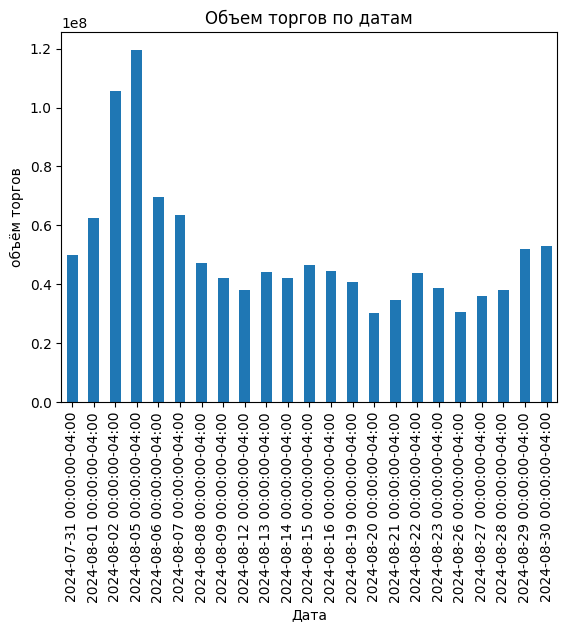

In [ ]:
import matplotlib.pyplot as plt

data['Volume'].plot(kind='bar')
plt.title('Объем торгов по датам')
plt.xlabel('Дата')
plt.ylabel('объём торгов')
plt.show()

## Подготовка отчета о качестве данных

На основе проведенного анализа мы можем подготовить отчет о качестве данных. В отчете следует указать:
- Количество пропущенных значений и методы их обработки.
- Основные характеристики данных, такие как среднее, медиана, стандартное отклонение.
- Выявленные корреляции между переменными.
- Наличие выбросов и их возможное влияние на анализ.

Этот отчет поможет нам понять, насколько данные готовы к дальнейшему анализу и моделированию.

## Заключение

В этом задании мы рассмотрели, как можно использовать признаковую инженерию для создания новых признаков из существующих данных. Эти новые признаки могут значительно улучшить качество анализа и моделей машинного обучения. Важно помнить, что создание признаков — это творческий процесс, и всегда стоит экспериментировать с различными подходами для достижения наилучших результатов.